# **Environment Setup**

In [1]:
# datasets to be used: "LaptopSalesJanuary2008.csv", "WHO.csv"
# upload datasets to a folder in Google Drive, e.g., My Drive/Colab Data
# connect to Google Drive, path to datasets is "/content/drive/My Drive/Colab Data/..."
# from google.colab import drive
# drive.mount('/content/drive')
filepath = '../data/'

In [2]:
## (if running in Colab you can skip this part)
## install required packages if not already in the environment
## either use anaconda navigator GUI or call conda on command prompt(win)/terminal(mac)
# conda install numpy
# conda install pandas
# conda install matplotlib
# conda install seaborn
# conda install -c conda-forge plotnine

In [3]:
# after installation, import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *

# **Example 1: Laptop Sales**

In [4]:
# Laptop Sales at a London Computer Chain - LaptopSalesJanuary2008.csv

# load data as a Dataframe
laptop_df = pd.read_csv(filepath+'LaptopSalesJanuary2008.csv')

# check if data is loaded correctly
laptop_df.head()

,Date,Configuration,Customer Postcode,Store Postcode,Retail Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?,OS X Customer,OS Y Customer,OS X Store,OS Y Store,CustomerStoreDistance
0,1/1/2008 0:01,163,EC4V 5BH,SE1 2BN,455,15,5,1,2.0,Yes,80,Yes,532041,180995,534057.0,179682.0,2405.873022
1,1/1/2008 0:02,320,SW4 0JL,SW12 9HD,545,15,6,1,2.0,No,300,No,529240,175537,528739.0,173080.0,2507.558574
2,1/1/2008 0:04,23,EC3V 1LR,E2 0RY,515,15,4,1,2.0,Yes,300,Yes,533095,181047,535652.0,182961.0,3194.001409
3,1/1/2008 0:04,169,SW1P 3AU,SE1 2BN,395,15,5,1,2.0,No,40,Yes,529902,179641,534057.0,179682.0,4155.202281
4,1/1/2008 0:06,365,EC4V 4EG,SW1V 4QQ,585,15,6,2,2.0,No,120,Yes,531684,180948,528924.0,178440.0,3729.298057


In [5]:
# print a concise summary of the Dataframe
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7956 entries, 0 to 7955
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    7956 non-null   object 
 1   Configuration           7956 non-null   int64  
 2   Customer Postcode       7956 non-null   object 
 3   Store Postcode          7956 non-null   object 
 4   Retail Price            7956 non-null   int64  
 5   Screen Size (Inches)    7956 non-null   int64  
 6   Battery Life (Hours)    7956 non-null   int64  
 7   RAM (GB)                7956 non-null   int64  
 8   Processor Speeds (GHz)  7956 non-null   float64
 9   Integrated Wireless?    7956 non-null   object 
 10  HD Size (GB)            7956 non-null   int64  
 11  Bundled Applications?   7956 non-null   object 
 12  OS X Customer           7956 non-null   int64  
 13  OS Y Customer           7956 non-null   int64  
 14  OS X Store              7952 non-null   

## **Pre-processing:**

In [6]:
# Print the list of variables to the screen
laptop_df.columns

Index(['Date', 'Configuration', 'Customer Postcode', 'Store Postcode',
       'Retail Price', 'Screen Size (Inches)', 'Battery Life (Hours)',
       'RAM (GB)', 'Processor Speeds (GHz)', 'Integrated Wireless?',
       'HD Size (GB)', 'Bundled Applications?', 'OS X Customer',
       'OS Y Customer', 'OS X Store', 'OS Y Store', 'CustomerStoreDistance'],
      dtype='object')

In [7]:
# Change the variable names to be more suitable for analysis
laptop_df.columns = ("Date", "Configuration", "Customer_Postcode", "Store_Postcode",
                     "Retail_Price", "Screen_Size_Inches", "Battery_Life_Hours",
                     "RAM_GB", "Processor_Speeds_GHz", "Integrated_Wireless", 
                     "HD_Size_GB", "Bundled_Applications", "customer_X", 
                     "customer_Y", "store_X", "store_Y", "CustomerStoreDistance")
laptop_df.columns

Index(['Date', 'Configuration', 'Customer_Postcode', 'Store_Postcode',
       'Retail_Price', 'Screen_Size_Inches', 'Battery_Life_Hours', 'RAM_GB',
       'Processor_Speeds_GHz', 'Integrated_Wireless', 'HD_Size_GB',
       'Bundled_Applications', 'customer_X', 'customer_Y', 'store_X',
       'store_Y', 'CustomerStoreDistance'],
      dtype='object')

## **Task 1:** compute the average retail price by store postcode

In [8]:
# use dataframe "groupby()" function
# note, this is going to convert the 'dataframe' into a 'Series' object
myprices = laptop_df.groupby('Store_Postcode').Retail_Price.mean()

## **Task 2:** compare mean retail prices across the various postcodes in a barchart. Where are the min and max prices located?

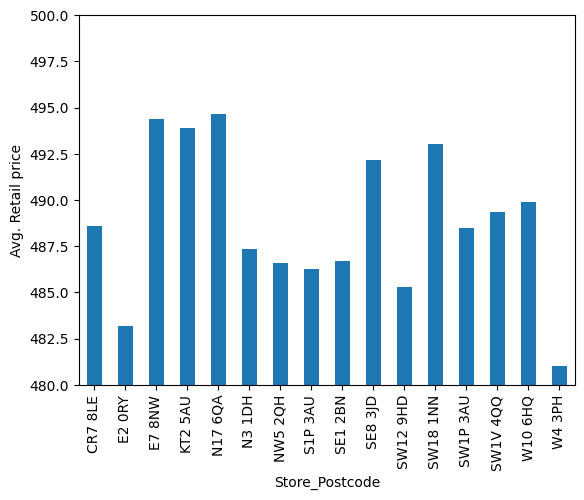

In [9]:
# barchart of store vs. mean retail price
# we're going to use pandas' built-in plot() function
ax = myprices.plot(kind='bar')
ax.set_ylabel('Avg. Retail price')
ax.set_ylim(480,500);

## **Task 3:** compare retail price distributions across the various postcodes in a boxplot

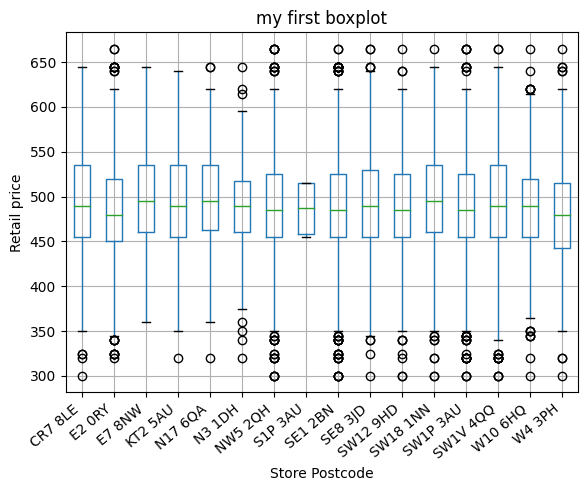

In [10]:
# pandas boxplot() function to plot boxplots of retail price by store
# grouping method is embedded, so we can use the original laptop dataframe
ax = laptop_df.boxplot(column='Retail_Price', by='Store_Postcode');

# make the figure more readable
ax.set_xlabel('Store Postcode');
ax.set_ylabel('Retail price');
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");
plt.suptitle('');  # Suppress the auto-generated title
plt.title('my first boxplot');

# **Example 2: World Health Organization (WHO)**

In [11]:
# World Health Organization – WHO.csv

# load data as a Dataframe
who_df = pd.read_csv(filepath+'WHO.csv')
who_df.head()

,Country,Region,Population,Under15,Over60,FertilityRate,LifeExpectancy,ChildMortality,CellularSubscribers,LiteracyRate,GNI,PrimarySchoolEnrollmentMale,PrimarySchoolEnrollmentFemale
0,Afghanistan,Eastern Mediterranean,29825,47.42,3.82,5.40,60,98.5,54.26,NaN,1140.0,NaN,NaN
1,Albania,Europe,3162,21.33,14.93,1.75,74,16.7,96.39,NaN,8820.0,NaN,NaN
2,Algeria,Africa,38482,27.42,7.17,2.83,73,20.0,98.99,NaN,8310.0,98.2,96.4
3,Andorra,Europe,78,15.20,22.86,NaN,82,3.2,75.49,NaN,NaN,78.4,79.4
4,Angola,Africa,20821,47.58,3.84,6.10,51,163.5,48.38,70.1,5230.0,93.1,78.2


In [12]:
# print a concise summary of the Dataframe
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        194 non-null    object 
 1   Region                         194 non-null    object 
 2   Population                     194 non-null    int64  
 3   Under15                        194 non-null    float64
 4   Over60                         194 non-null    float64
 5   FertilityRate                  183 non-null    float64
 6   LifeExpectancy                 194 non-null    int64  
 7   ChildMortality                 194 non-null    float64
 8   CellularSubscribers            184 non-null    float64
 9   LiteracyRate                   103 non-null    float64
 10  GNI                            162 non-null    float64
 11  PrimarySchoolEnrollmentMale    101 non-null    float64
 12  PrimarySchoolEnrollmentFemale  101 non-null    flo

## **Task 1:** what's the relationship between Fertitility Rate and GNI (gross nat. income)?

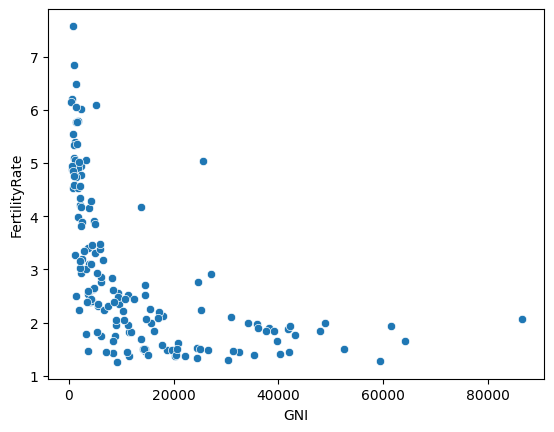

In [13]:
# using seaborn scatterplot() function
sns.scatterplot(data=who_df, x='GNI', y='FertilityRate');

**Answer:**
there is a clear non-linear relationship (possibly non causal), the higher the GNI, the lower the fertility rate

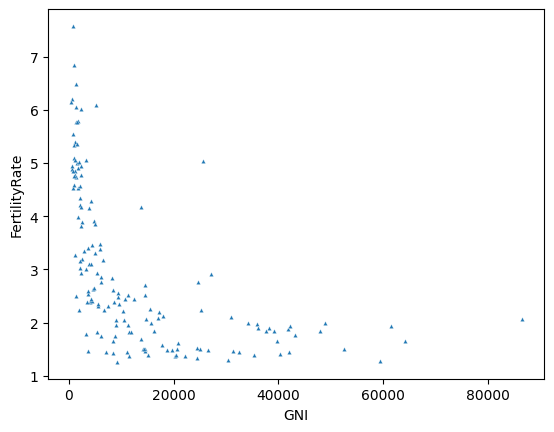

In [14]:
# change marker type & size
sns.scatterplot(data=who_df, x='GNI', y='FertilityRate', marker='^', s=10);

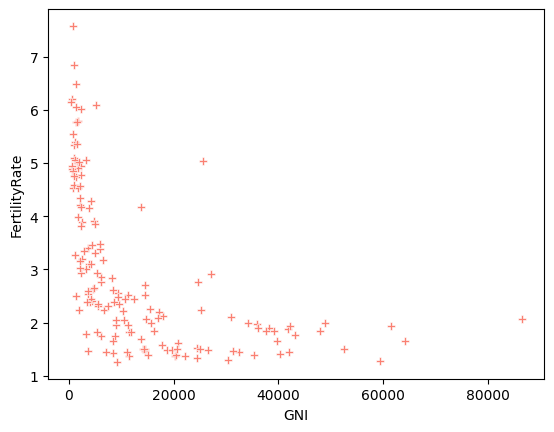

In [15]:
# change marker type and color
sns.scatterplot(data=who_df, x='GNI', y='FertilityRate', color='salmon', marker='P', s=30);

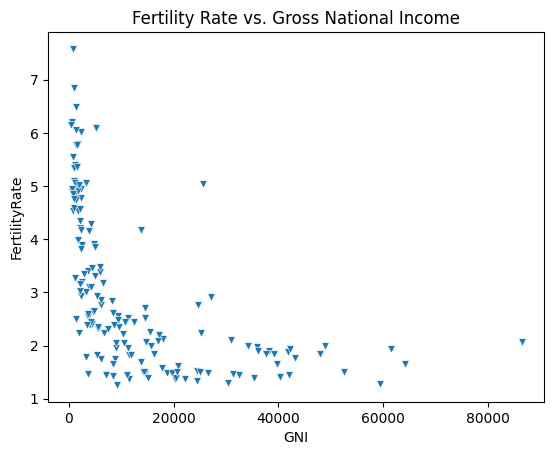

In [16]:
# add title
ax = sns.scatterplot(data=who_df, x='GNI', y='FertilityRate', marker='v', s=30)
ax.set_title('Fertility Rate vs. Gross National Income');

In [17]:
# save graph as image
ax.figure.savefig('../image/fig_fert_vs_gni.png')

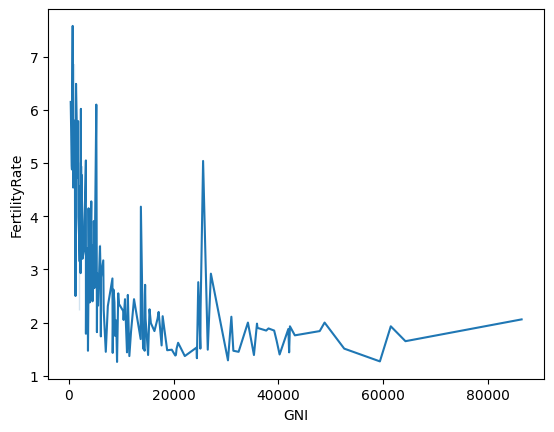

In [18]:
# same thing with lineplot() function
# good idea?
sns.lineplot(data=who_df, x='GNI', y='FertilityRate');

**Answer:** not a great idea to use a lineplot here... this is not a "timeseries" type of data

## **Task 2:** Add a 3rd dimension to represent "Regions", then "LifeExpectancy"

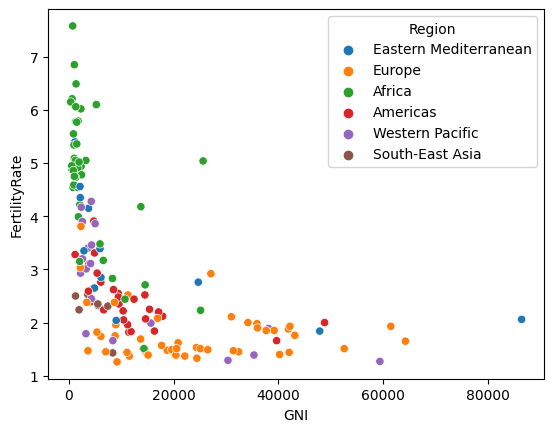

In [19]:
# color the observations by region (categorical)
sns.scatterplot(data=who_df, x='GNI', y='FertilityRate', hue='Region');

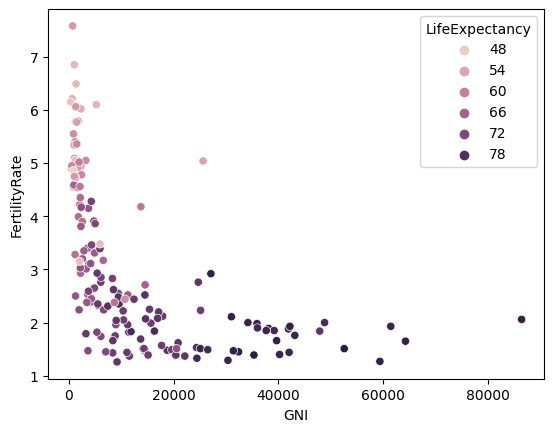

In [20]:
# color the observations according to life expectancy (numeric)
sns.scatterplot(data=who_df, x='GNI', y='FertilityRate', hue='LifeExpectancy');

**Note:** when moving from categorical to numerical 3rd dimension, switch to monochromatic [palette](https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f)!

**Insight:** "Lower Fertility" is correlated with higher "Life Expectancy" and "GNI" (but careful not to be inferring causality)

## **Task 3:** is the fertility rate of a country a good predictor of the percentage of the population under 15?

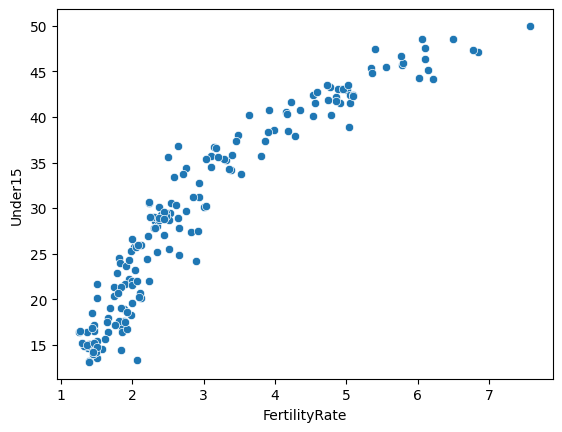

In [21]:
sns.scatterplot(data=who_df, x='FertilityRate', y='Under15');

**Answer:** There seems to be a strong, albeit non-linear relationship. To run a linear regression, it would be appropriate to first run a log transformation of the data.

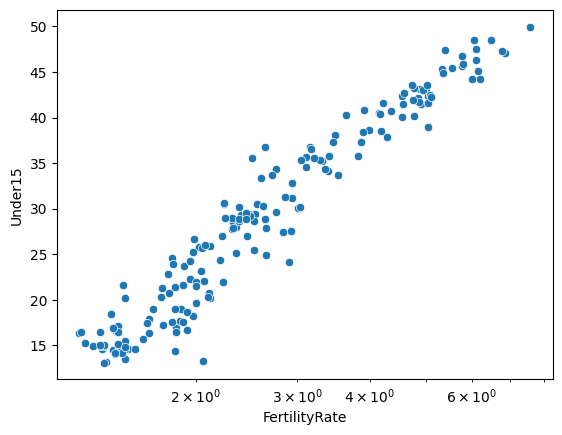

In [22]:
# visualize a log transformation by changing the scale of the x axis
splot = sns.scatterplot(data=who_df, x='FertilityRate', y='Under15')
splot.set(xscale='log');

       Country                 Region  Population  Under15  Over60  \
0  Afghanistan  Eastern Mediterranean       29825    47.42    3.82   
1      Albania                 Europe        3162    21.33   14.93   
2      Algeria                 Africa       38482    27.42    7.17   
3      Andorra                 Europe          78    15.20   22.86   
4       Angola                 Africa       20821    47.58    3.84   

   FertilityRate  LifeExpectancy  ChildMortality  CellularSubscribers  \
0           5.40              60            98.5                54.26   
1           1.75              74            16.7                96.39   
2           2.83              73            20.0                98.99   
3            NaN              82             3.2                75.49   
4           6.10              51           163.5                48.38   

   LiteracyRate     GNI  PrimarySchoolEnrollmentMale  \
0           NaN  1140.0                          NaN   
1           NaN  8820.0     

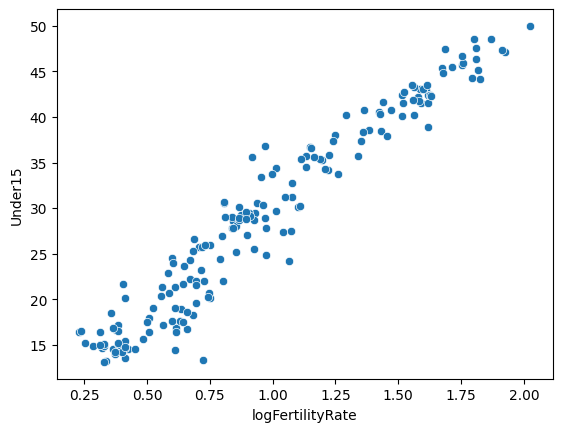

In [23]:
# alternative log transformation 
# this method adds a new column to the who_df dataframe containing the log
who_df['logFertilityRate'] = np.log(who_df['FertilityRate'])
print(who_df.head())
sns.scatterplot(data=who_df, x='logFertilityRate', y='Under15');

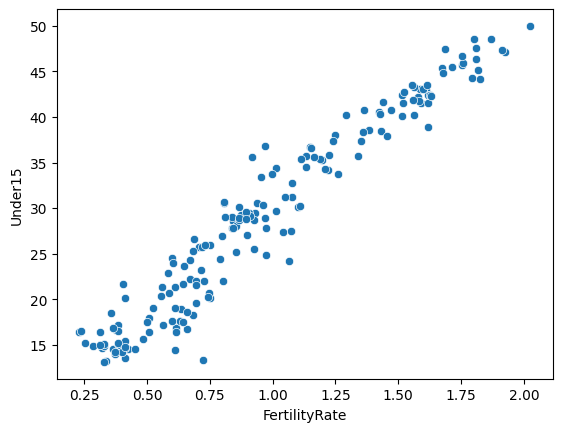

In [24]:
# yet another log transformation 
sns.scatterplot(data=who_df, x=np.log(who_df['FertilityRate']), y='Under15');

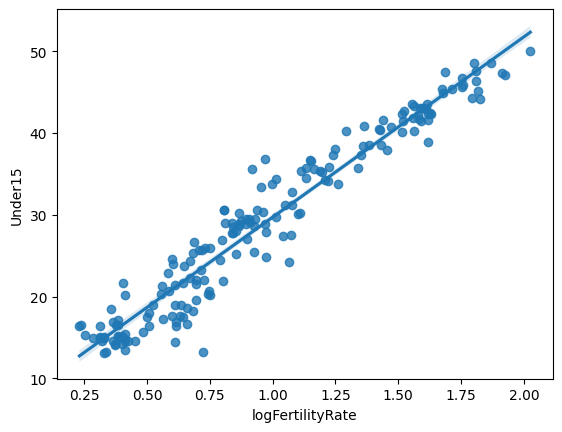

In [25]:
# add a regression line to our plot
# default confidence interval is 95%
sns.regplot(data=who_df, x='logFertilityRate', y='Under15');

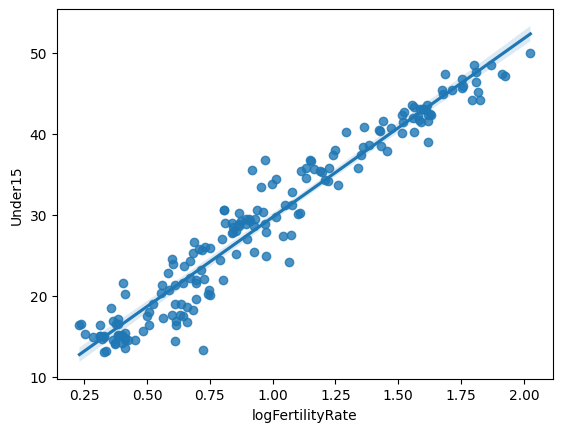

In [26]:
# 99% confidence interval
sns.regplot(data=who_df, x='logFertilityRate', y='Under15', ci=99);

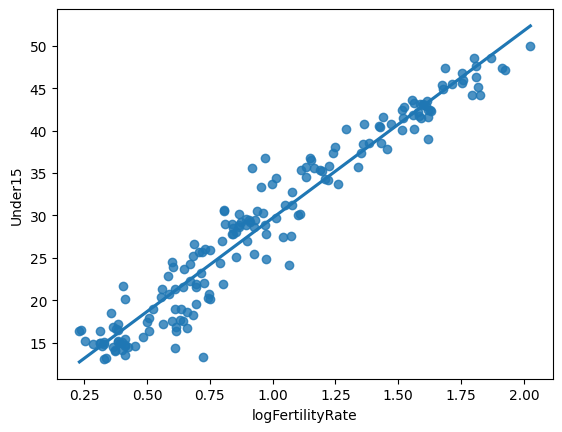

In [27]:
# no confidence interval
sns.regplot(data=who_df, x='logFertilityRate', y='Under15', ci=None);

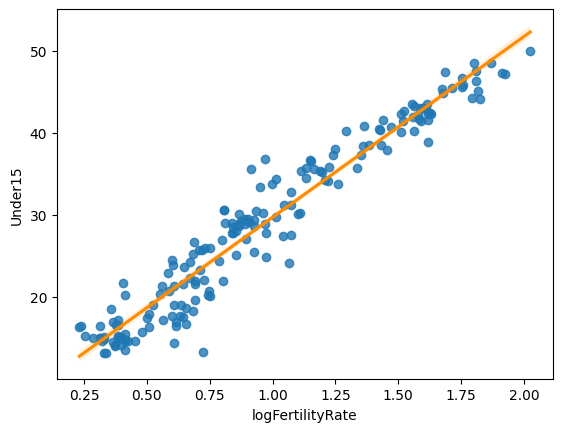

In [28]:
# change the color of the regression line
sns.regplot(data=who_df, x='logFertilityRate', y='Under15', line_kws={'color':'darkorange'});

# **Example 3: Re-plot WHO data using ggplot**

Required components for creating a plot w/ ggplot (grammar of graphics):

1.   Data is the information to use when creating the plot.
2.   Aesthetics (aes) provides a mapping between data variables and aesthetic, or graphical, variables used by the underlying drawing system.
3.   Geometric objects (geoms) defines the type of geometric object to use in the drawing. You can use points, lines, bars, and many others.

In [29]:
# Fertility Rate vs. Gross National Income
scatterplot = ggplot(who_df,aes(x='GNI', y='FertilityRate'))

/Users/davidekim/tensorflow/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 35 rows containing missing values.


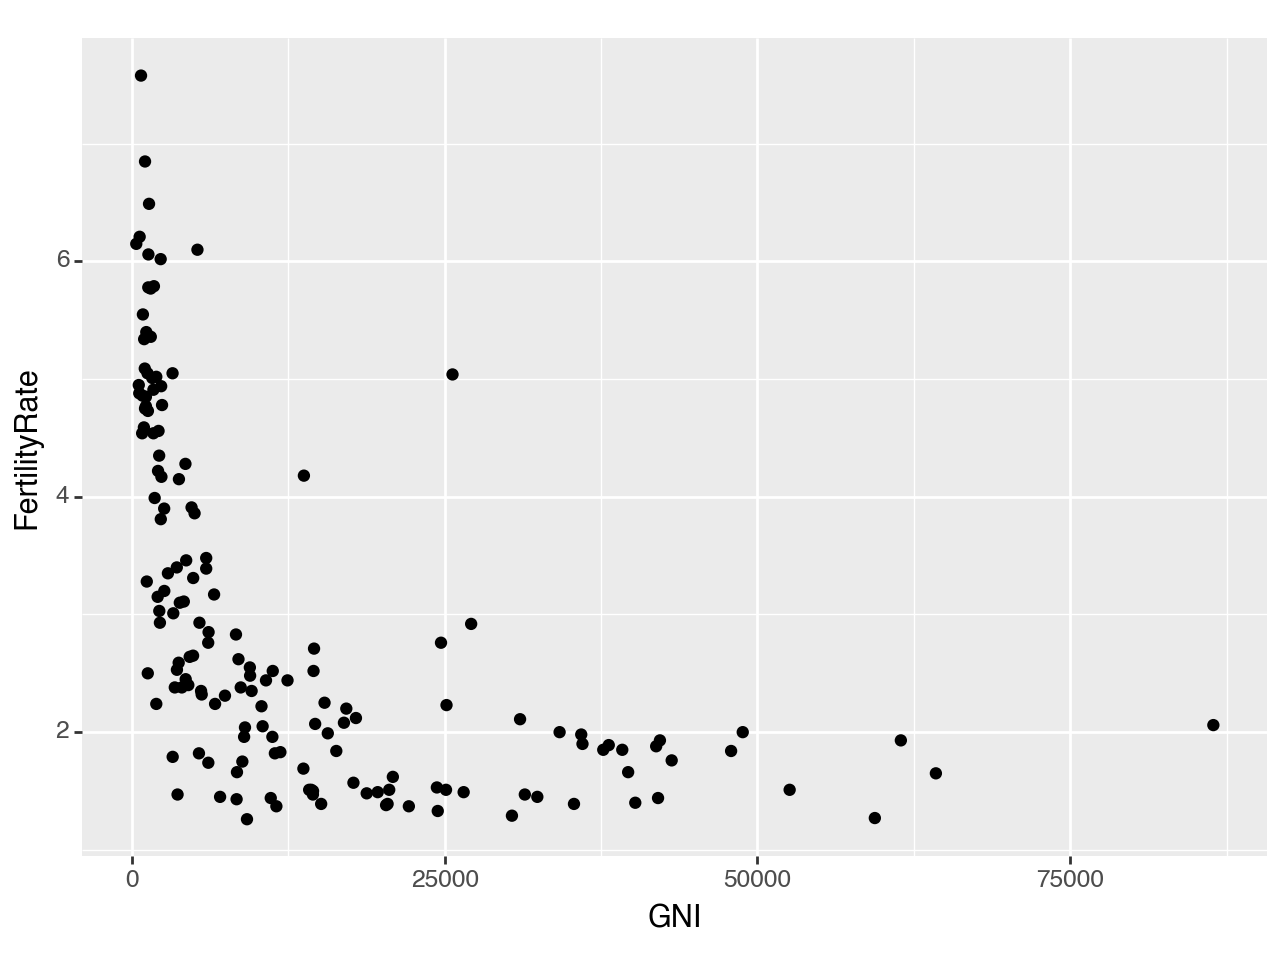

<Figure Size: (640 x 480)>

In [30]:
(scatterplot 
 + geom_point())

/Users/davidekim/tensorflow/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 32 rows containing missing values.


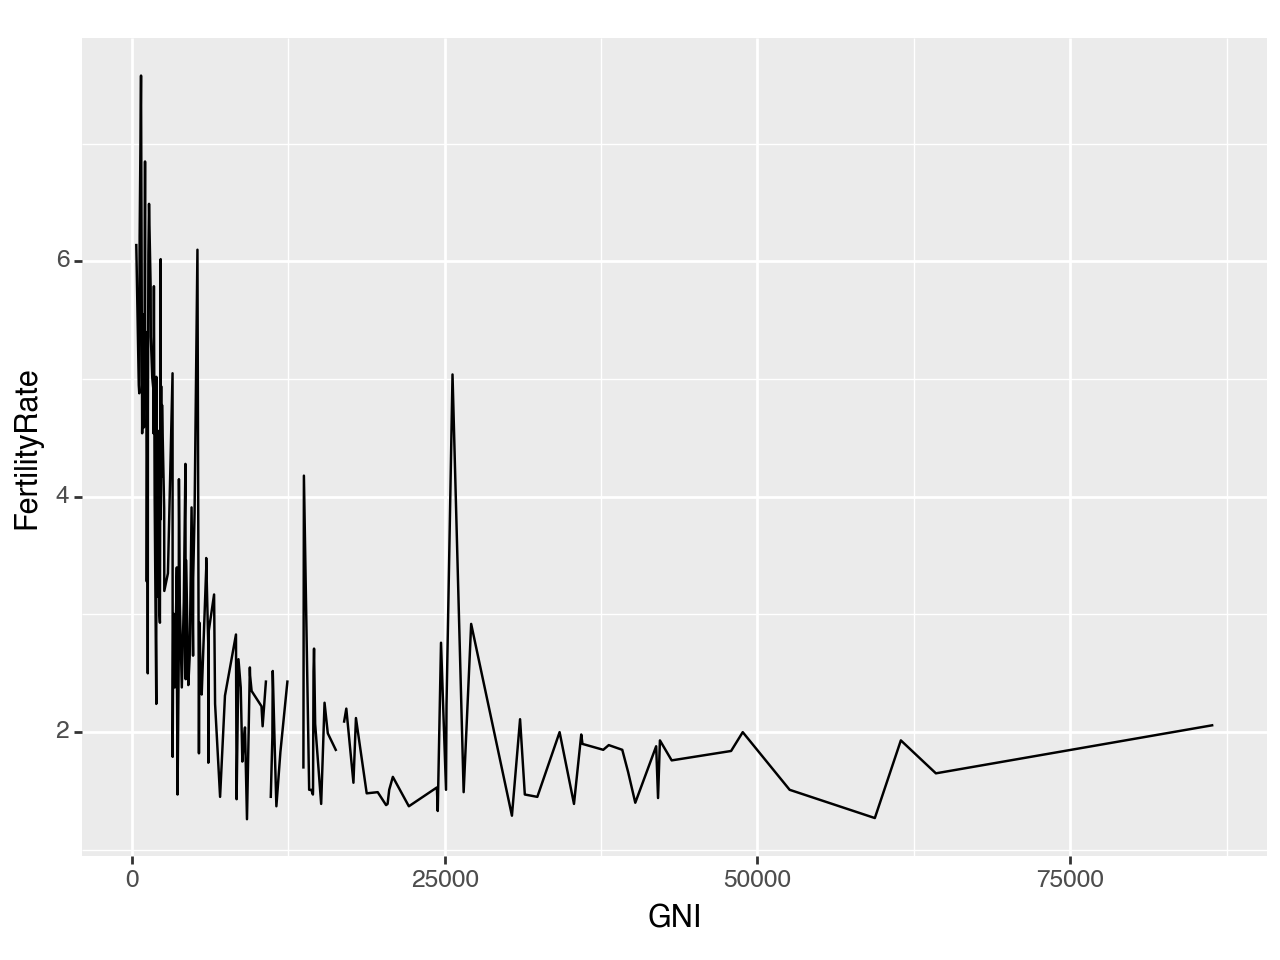

<Figure Size: (640 x 480)>

In [31]:
(scatterplot 
 + geom_line())

/Users/davidekim/tensorflow/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 35 rows containing missing values.


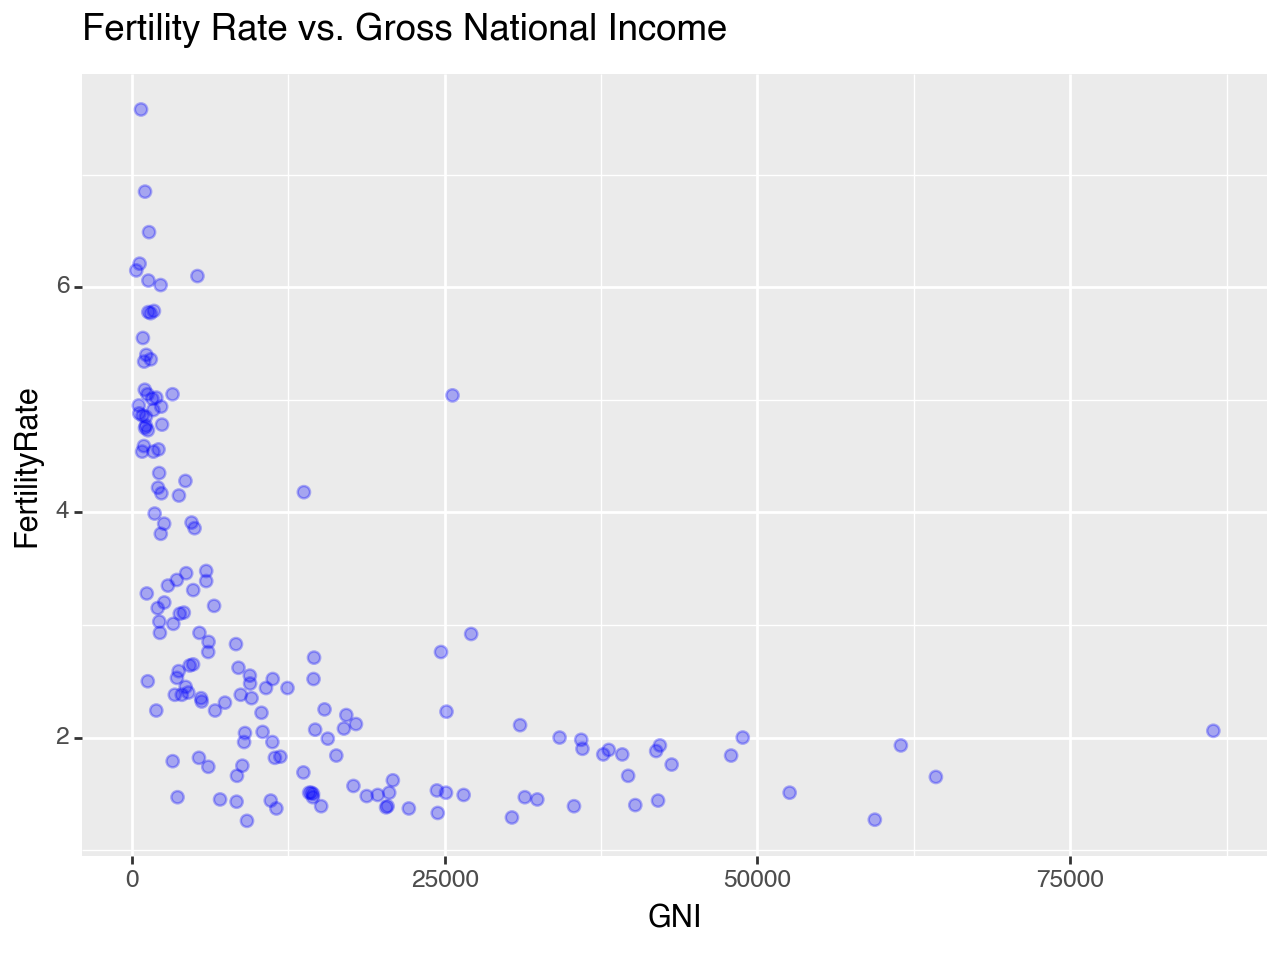

<Figure Size: (640 x 480)>

In [32]:
(scatterplot 
 + geom_point(color="blue", size=2, alpha=0.3) 
 + ggtitle('Fertility Rate vs. Gross National Income'))

/Users/davidekim/tensorflow/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 35 rows containing missing values.


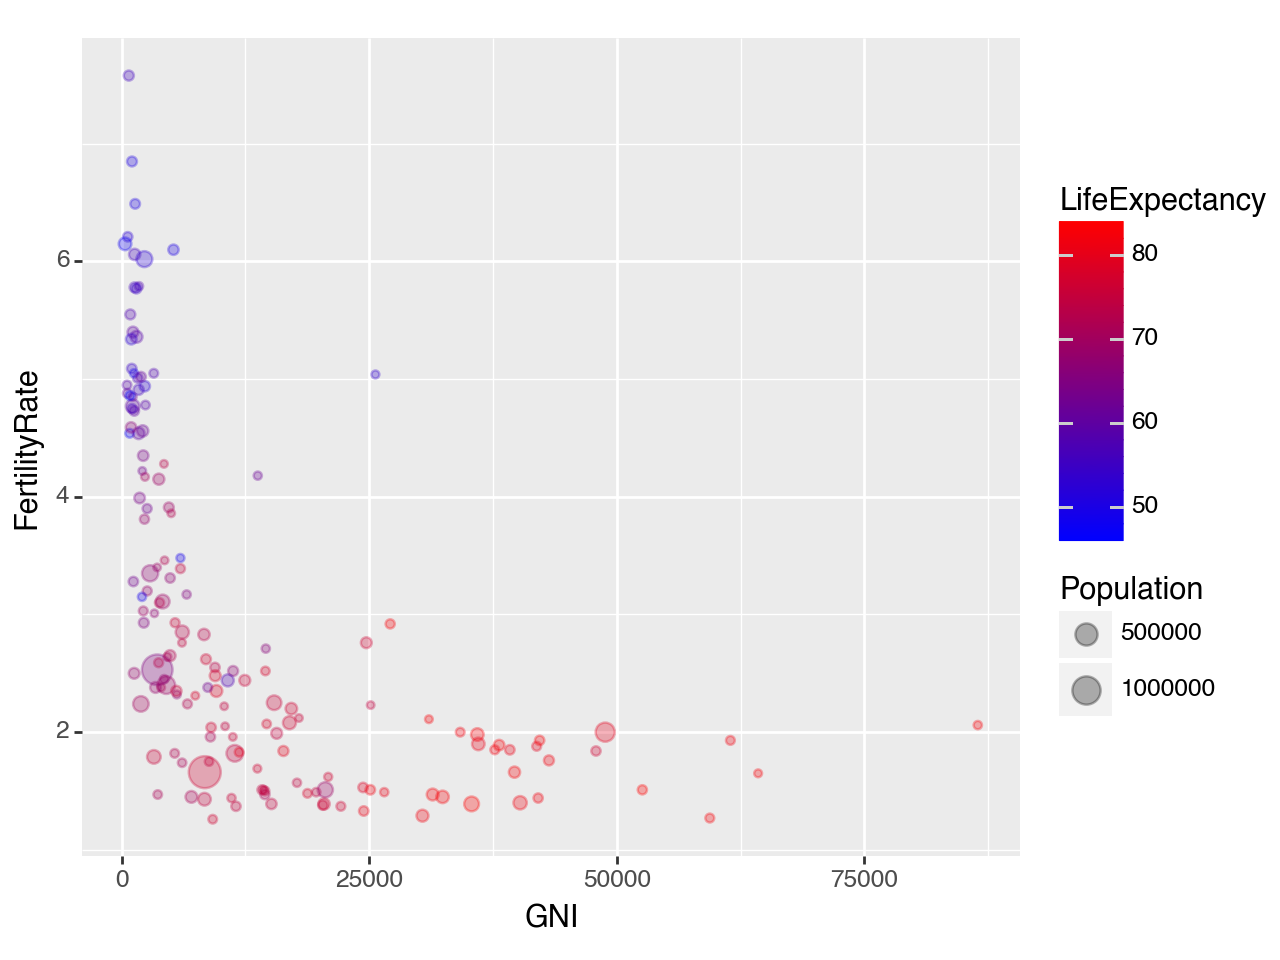

<Figure Size: (640 x 480)>

In [33]:
(scatterplot 
 + geom_point(aes(color='LifeExpectancy', size='Population'), alpha=0.3) 
 + scale_color_gradient(low='blue', high='red'))

/Users/davidekim/tensorflow/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


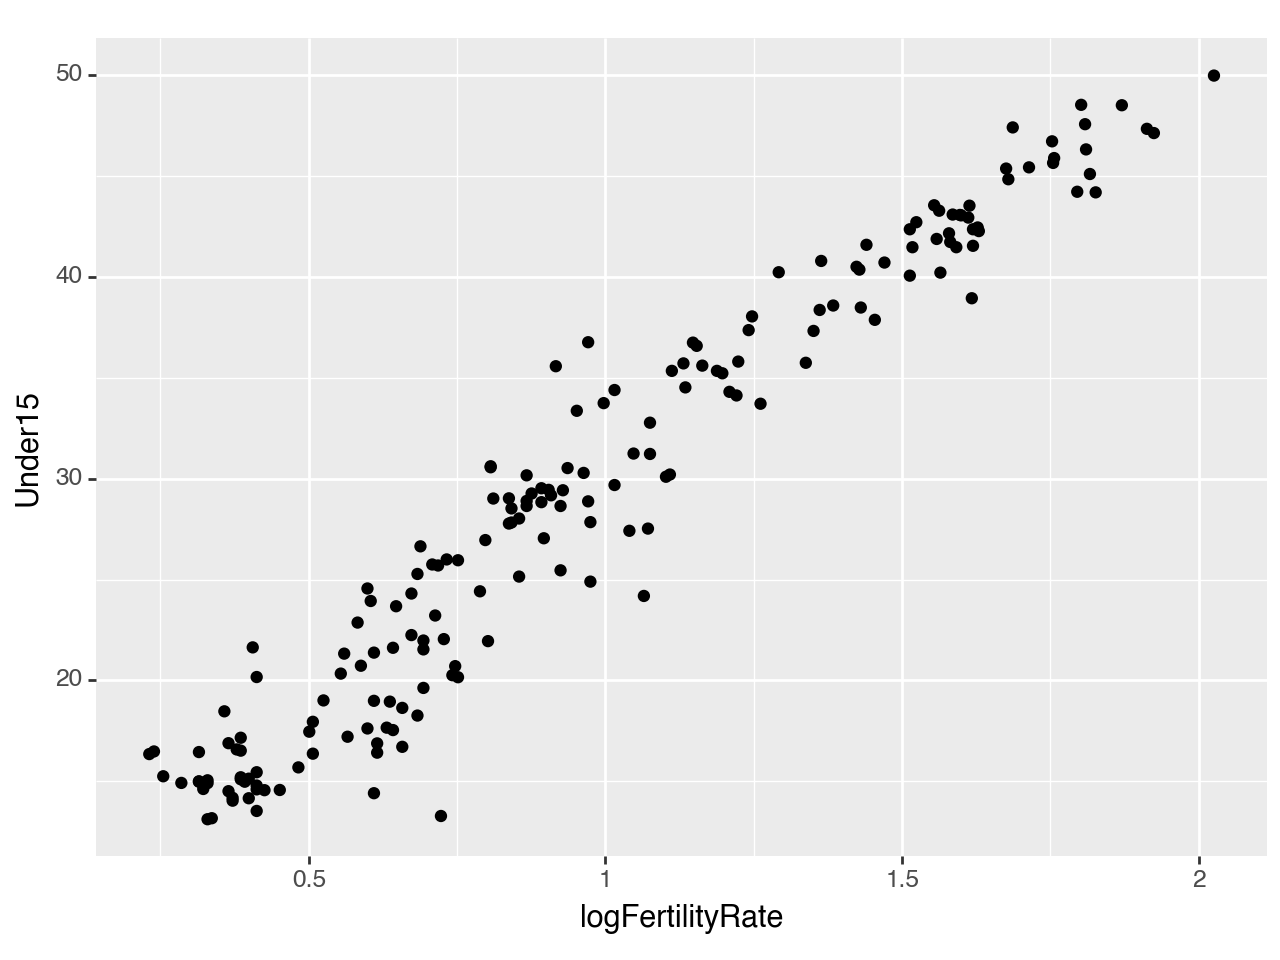

<Figure Size: (640 x 480)>

In [34]:
# Fertility Rate vs. Percentage of the Population under 15
(ggplot(who_df, aes(x='logFertilityRate', y='Under15')) 
 + geom_point())

/Users/davidekim/tensorflow/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


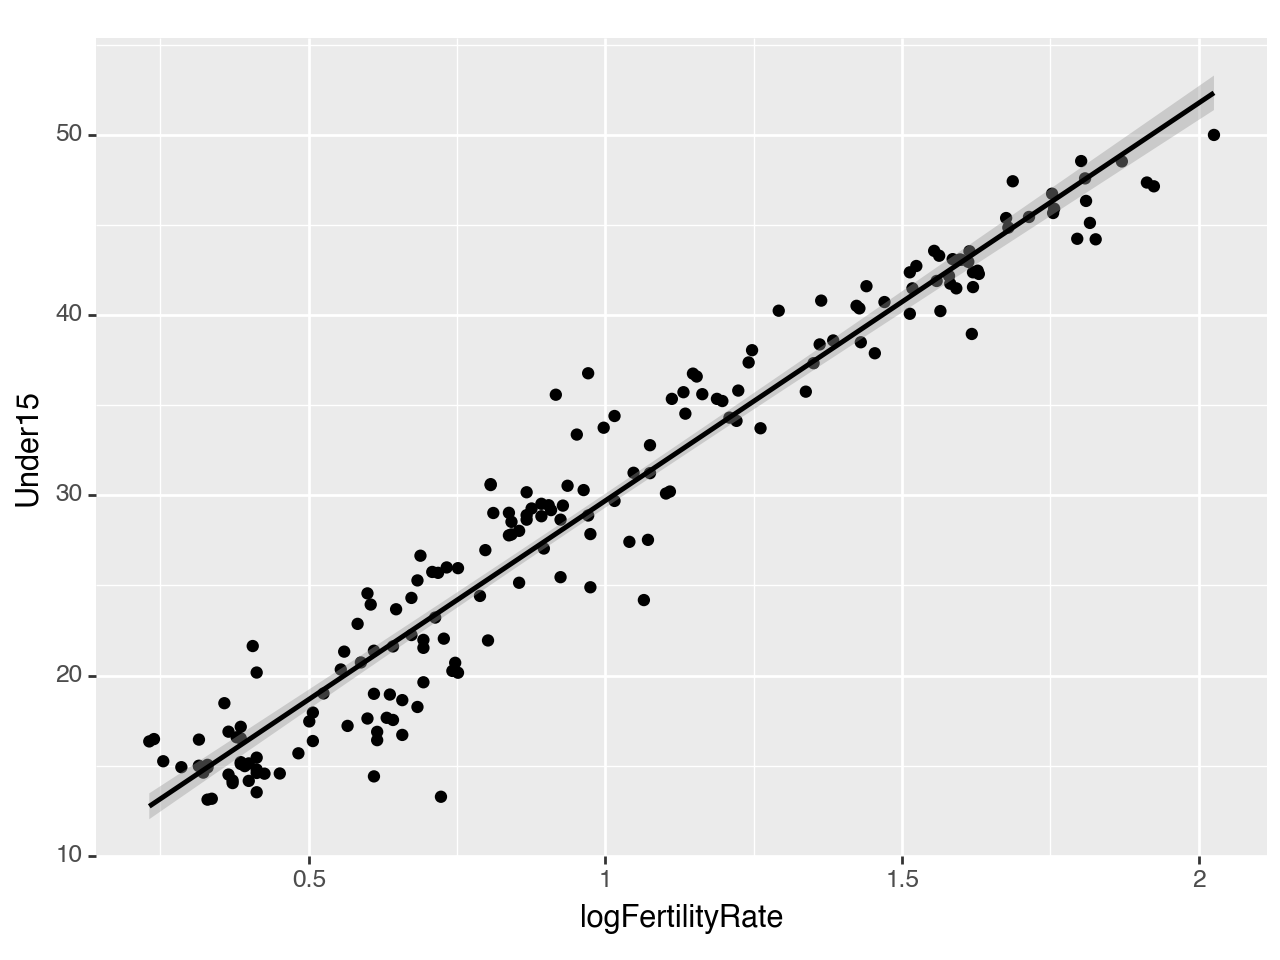

<Figure Size: (640 x 480)>

In [35]:
(ggplot(who_df, aes(x='logFertilityRate', y='Under15')) 
 + geom_point() 
 + stat_smooth(method='lm'))

/Users/davidekim/tensorflow/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


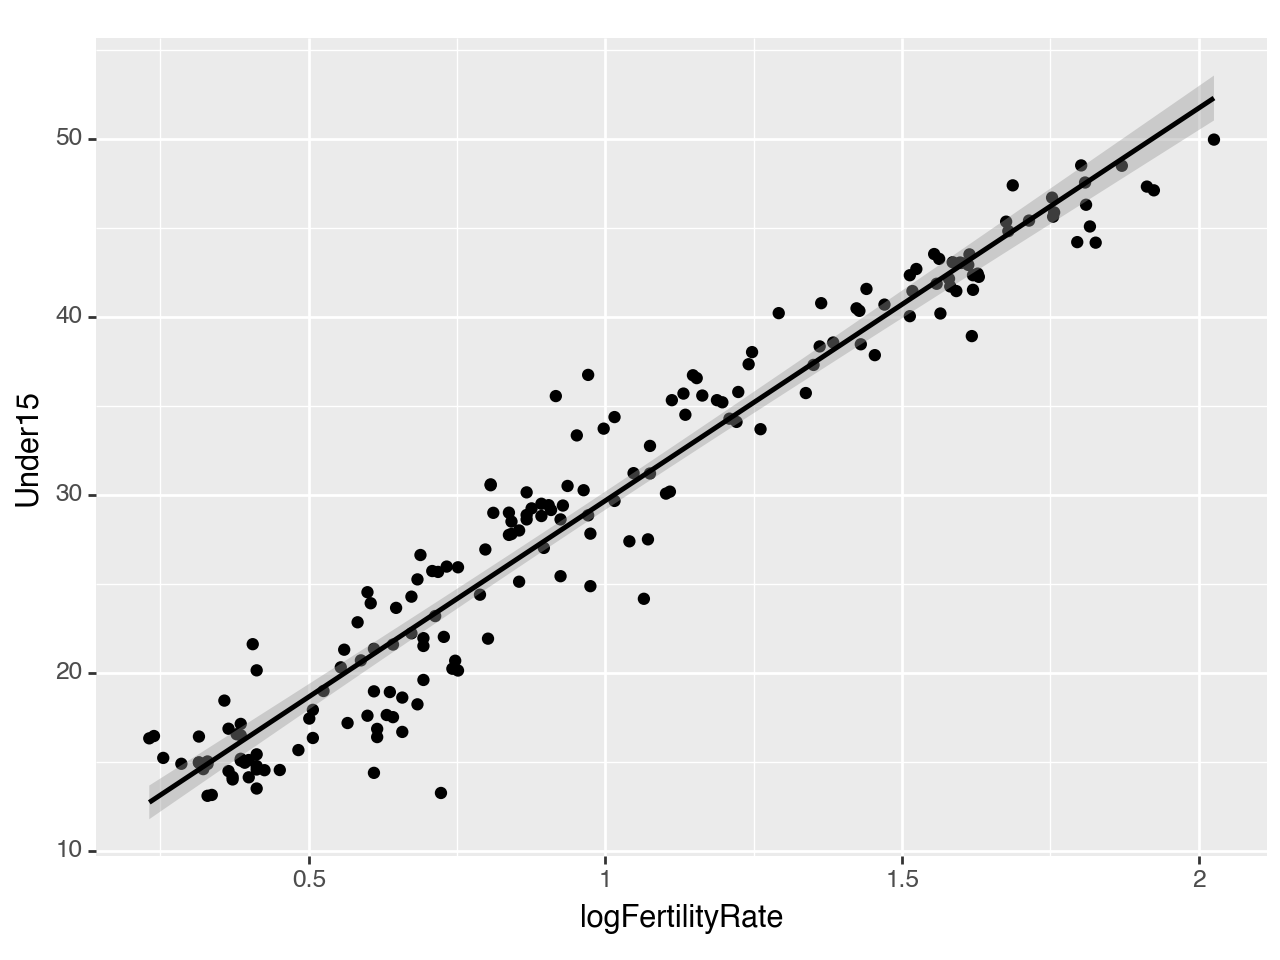

<Figure Size: (640 x 480)>

In [36]:
(ggplot(who_df, aes(x='logFertilityRate', y='Under15')) 
 + geom_point() 
 + stat_smooth(method='lm', level=0.99))

/Users/davidekim/tensorflow/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


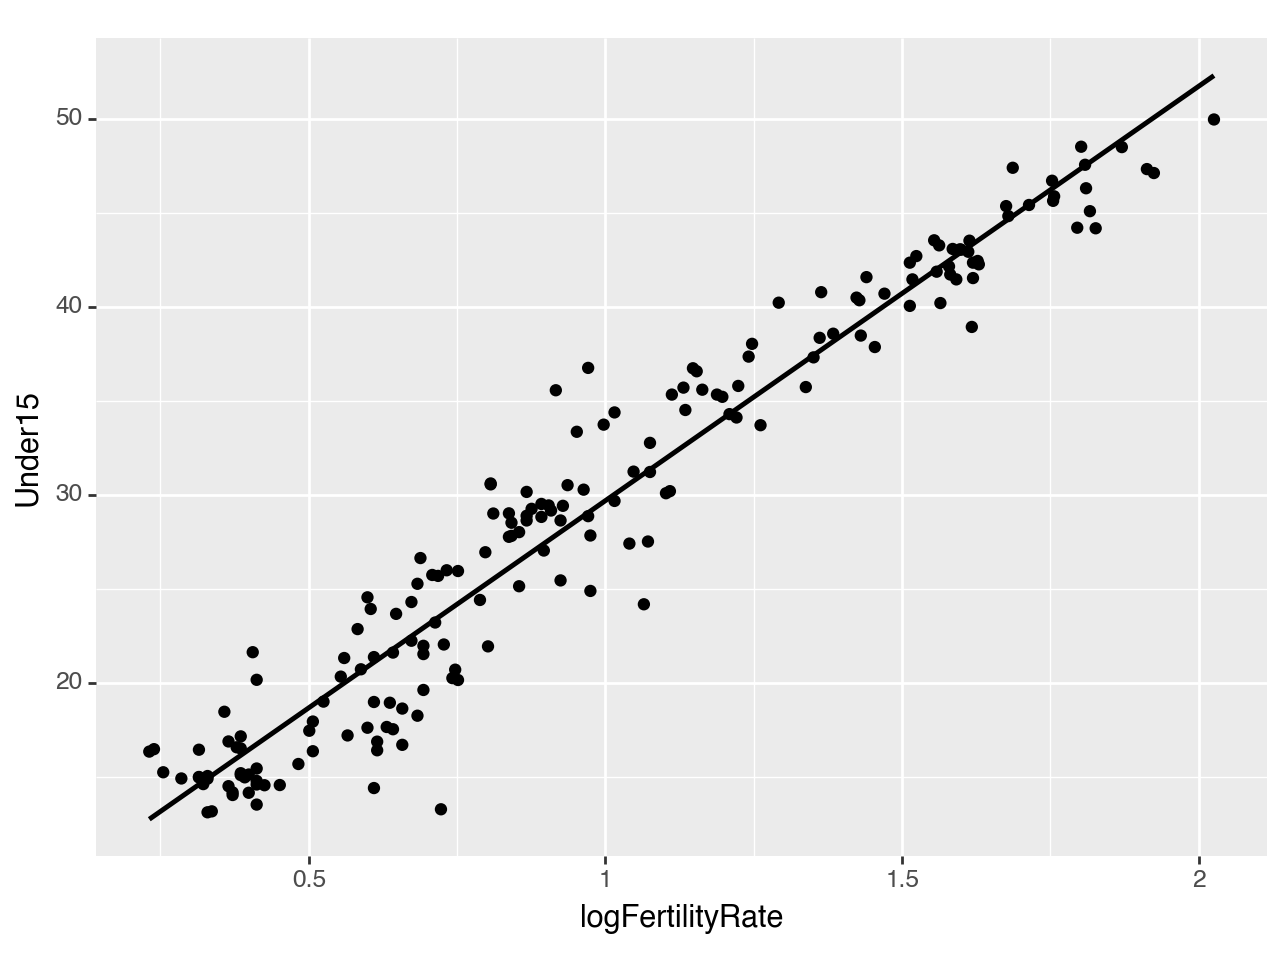

<Figure Size: (640 x 480)>

In [37]:
(ggplot(who_df, aes(x='logFertilityRate', y='Under15')) 
 + geom_point() 
 + stat_smooth(method='lm', se=False))

/Users/davidekim/tensorflow/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


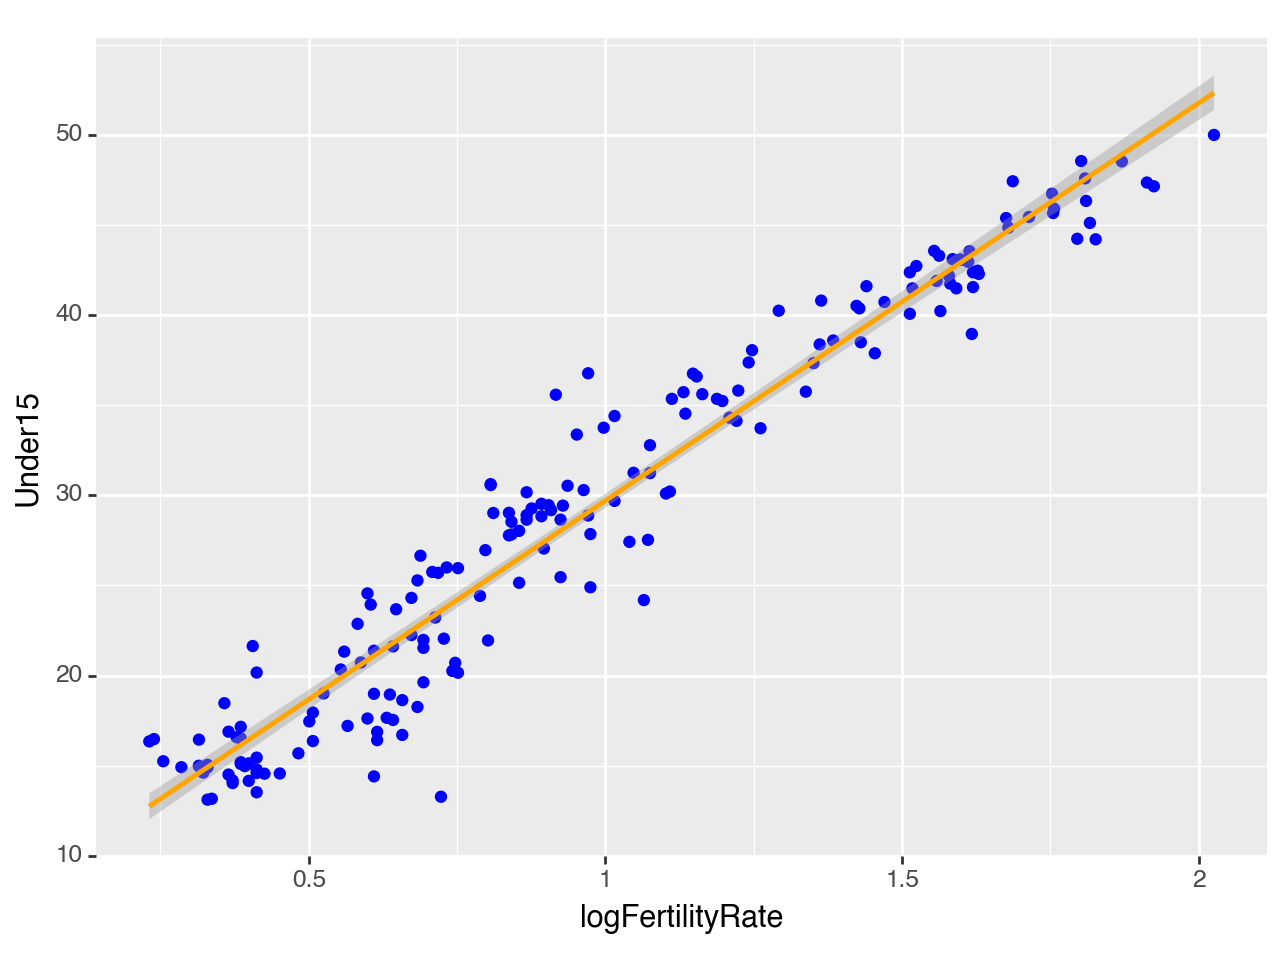

<Figure Size: (640 x 480)>

In [38]:
(ggplot(who_df, aes(x='logFertilityRate', y='Under15')) 
 + geom_point(color='blue') 
 + stat_smooth(method='lm', color='orange'))